In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 


from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import train_test_split 
from sklearn import metrics 

In [2]:
#loading data
df = pd.read_csv("DatasetSoccerForModeling2.csv")

In [3]:
df.head()

,Unnamed: 0,HS,AS,GD,WDL,Index HT,Index AT,Score HT,Score AT
0,0,4,0,4,1,1,12,0.253450,0.240147
1,1,0,0,0,0,2,20,0.221600,0.266400
2,2,1,1,0,0,3,15,0.303931,0.256000
3,3,1,1,0,0,4,19,0.192320,0.363009
4,4,0,0,0,0,5,13,0.166400,0.198187


In [24]:
df2 = df.drop(['Unnamed: 0','Unnamed: 0.1','HS','AS'],axis=1)
df2['WDL'] = df2['WDL'].replace({-1:2})

In [7]:
# X is a matrix, hence we use [] to access the features we want in feature_cols

X = df2.copy()


# y is a vector, hence we use dot to access 'label'
y = df2.WDL
y = y.replace({-1:2})

In [6]:
#df2.to_csv('DatabaseSoccerFinal.csv')

In [25]:
# split X and y into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3, random_state=0)

In [26]:
# train a logistic regression model on the training set
from sklearn.linear_model import LogisticRegression

# instantiate model
logreg = LogisticRegression(solver='liblinear')

# fit model
logreg.fit(X_train, y_train)

LogisticRegression(solver='liblinear')

In [27]:
# make class predictions for the testing set
y_pred_class = logreg.predict(X_test)
y_pred_class

array([2, 1, 1, ..., 2, 2, 1])

In [28]:
# calculate accuracy
from sklearn import metrics
print(metrics.accuracy_score(y_test, y_pred_class))

0.7291224982332627


In [29]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred_class) 

cnf_matrix 

array([[  216,     0, 20111],
       [    0, 33900,     0],
       [  204,     0, 20566]])

Text(0.5, 427.9555555555555, 'Predicted label')

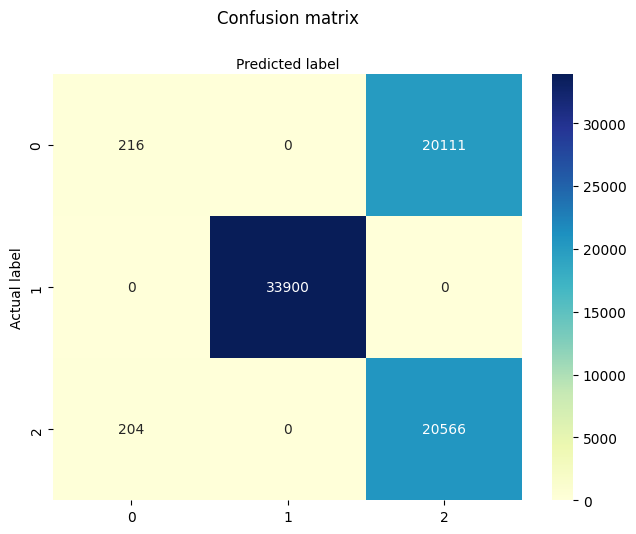

In [30]:
class_names=[0,1] # name  of classes 
fig, ax = plt.subplots() 
tick_marks = np.arange(len(class_names)) 
plt.xticks(tick_marks, class_names) 
plt.yticks(tick_marks, class_names) 

# create heatmap 

sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g') 
ax.xaxis.set_label_position("top") 
plt.tight_layout() 
plt.title('Confusion matrix', y=1.1) 
plt.ylabel('Actual label') 
plt.xlabel('Predicted label')

In [31]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_class)) 
print("Precision:",metrics.precision_score(y_test, y_pred_class,pos_label='positive',average='micro')) 
print("Recall:",metrics.recall_score(y_test, y_pred_class,pos_label='positive',average='micro'))
print("F1 Score:",metrics.f1_score(y_test, y_pred_class,average='micro'))


Accuracy: 0.7291224982332627
Precision: 0.7291224982332627
Recall: 0.7291224982332627
F1 Score: 0.7291224982332627
/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1386: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1386: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(


In [32]:
print('intercept ', logreg.intercept_[0])
print('classes', logreg.classes_)
pd.DataFrame({'coeff': logreg.coef_[0]}, 
             index=X.columns)

intercept  -6.429678141405709e-07
classes [0 1 2]


,coeff
Unnamed: 0,-1.230972e-06
Unnamed: 0.1,-1.230972e-06
Index HT,-3.810995e-04
Index AT,-3.905184e-04
GD,-1.836342e-06
WDL,-4.953897e-06
Score HT,-2.085477e-07
Score AT,-1.863336e-07


In [33]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train) 

KNeighborsClassifier()

In [34]:
# make class predictions for the testing set
y_pred_classk = knn.predict(X_test)
y_pred_classk

array([0, 1, 2, ..., 1, 0, 1])

In [35]:
cnf_matrixK = metrics.confusion_matrix(y_test, y_pred_classk) 

cnf_matrixK 

array([[ 6775, 10382,  3170],
       [10267, 19355,  4278],
       [ 6926,  9662,  4182]])

Text(0.5, 427.9555555555555, 'Predicted label')

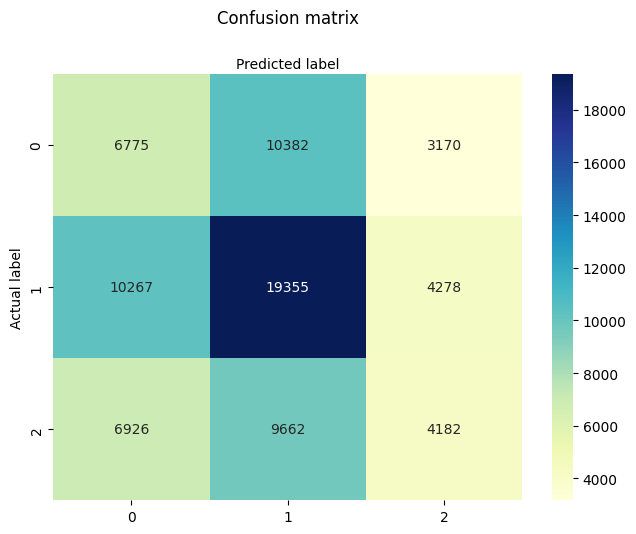

In [36]:
class_names=[0,1] # name  of classes 
fig, ax = plt.subplots() 
tick_marks = np.arange(len(class_names)) 
plt.xticks(tick_marks, class_names) 
plt.yticks(tick_marks, class_names) 

# create heatmap 

sns.heatmap(pd.DataFrame(cnf_matrixK), annot=True, cmap="YlGnBu" ,fmt='g') 
ax.xaxis.set_label_position("top") 
plt.tight_layout() 
plt.title('Confusion matrix', y=1.1) 
plt.ylabel('Actual label') 
plt.xlabel('Predicted label')

In [37]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_classk)) 
print("Precision:",metrics.precision_score(y_test, y_pred_classk,pos_label='positive',average='micro')) 
print("Recall:",metrics.recall_score(y_test, y_pred_classk,pos_label='positive',average='micro'))
print("F1 Score:",metrics.f1_score(y_test, y_pred_classk,average='micro'))

Accuracy: 0.40417616704668186
Precision: 0.40417616704668186
Recall: 0.40417616704668186
F1 Score: 0.40417616704668186
/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1386: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1386: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=79824a8e-00b0-4881-a9df-1348cb634c5a' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>